In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [2]:
df = pd.read_csv('TCS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-01,59.987499,61.974998,59.987499,61.087502,45.255402,6027072.0
1,2003-01-02,61.525002,62.924999,57.912498,58.299999,43.190327,5325328.0
2,2003-01-03,60.000000,61.049999,58.500000,59.012501,43.718178,4198040.0
3,2003-01-06,59.924999,60.187500,56.875000,57.262501,42.421741,4121520.0
4,2003-01-07,58.000000,58.500000,56.062500,56.599998,41.930927,2650800.0


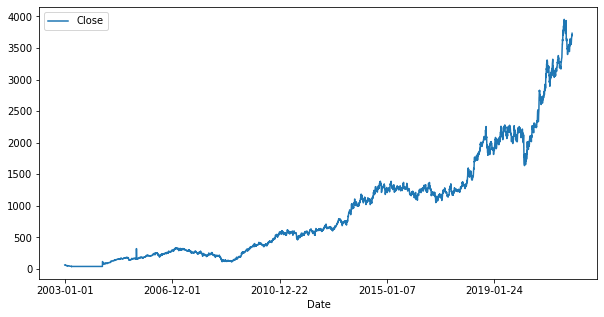

In [3]:
df.plot(x='Date', y='Close', kind='line', figsize=(10, 5))

In [4]:
df = df[['Close']]
df.dropna(inplace = True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Close
0,61.087502
1,58.299999
2,59.012501
3,57.262501
4,56.599998


In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(df)

In [6]:
trainSize = int(len(data)*0.7)
testSize = len(data) - trainSize
train = data[0:trainSize]
test = data[trainSize:len(data)]

In [7]:
def modify(data, pastDays = 14):
  X = []
  Y = []
  for i in range(pastDays, len(data)):
      X.append(data[i - 14: i, 0: data.shape[1]])
      Y.append(data[i : i + 1, 0])
  return np.array(X), np.array(Y)

In [8]:
trainX, trainY = modify(train)
testX, testY = modify(test)

RNN

In [9]:
model1 = Sequential()
model1.add(InputLayer((trainX.shape[1], trainX.shape[2])))
model1.add(SimpleRNN(100))
model1.add(Dense(trainY.shape[1]))
model1.compile(optimizer='adam', loss='mse')
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [10]:
model1.fit(trainX, trainY, validation_data = (testX, testY), epochs = 50)

Epoch 1/50
103/103 [==============================] - 5s 23ms/step - loss: 5.4584e-04 - val_loss: 0.0041
Epoch 2/50
103/103 [==============================] - 2s 15ms/step - loss: 2.4335e-05 - val_loss: 0.0027
Epoch 3/50
103/103 [==============================] - 1s 15ms/step - loss: 2.1406e-05 - val_loss: 0.0019
Epoch 4/50
103/103 [==============================] - 1s 12ms/step - loss: 1.6718e-05 - val_loss: 0.0016
Epoch 5/50
103/103 [==============================] - 1s 12ms/step - loss: 1.4189e-05 - val_loss: 7.5246e-04
Epoch 6/50
103/103 [==============================] - 1s 7ms/step - loss: 1.4761e-05 - val_loss: 5.7996e-04
Epoch 7/50
103/103 [==============================] - 1s 7ms/step - loss: 1.4220e-05 - val_loss: 7.7545e-04
Epoch 8/50
103/103 [==============================] - 1s 8ms/step - loss: 1.2034e-05 - val_loss: 5.2961e-04
Epoch 9/50
103/103 [==============================] - 1s 7ms/step - loss: 1.5026e-05 - val_loss: 2.3541e-04
Epoch 10/50
103/103 [==================

In [11]:
trainPredict1 = model1.predict(trainX)
testPredict1 = model1.predict(testX)
trainPredict1 = scaler.inverse_transform(trainPredict1)
testPredict1 = scaler.inverse_transform(testPredict1)
trainY1 = scaler.inverse_transform(trainY.reshape(-1, 1))
testY1 = scaler.inverse_transform(testY.reshape(-1, 1))

In [12]:
mape1 = np.mean(np.abs((testY1 - testPredict1)/testY1))*100
mape1

1.6072051285072473

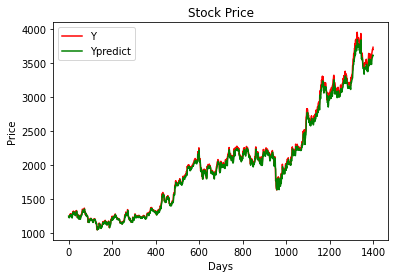

In [13]:
days = [i for i in range(0, len(testY1))]
plt.plot(days, testY1, color='r', label='Y')
plt.plot(days, testPredict1, color='g', label='Ypredict')  
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Stock Price")
plt.legend()
plt.show()

Classic LSTM

In [14]:
model2 = Sequential()
model2.add(InputLayer((trainX.shape[1], trainX.shape[2])))
model2.add(LSTM(200))
model2.add(Dense(trainY.shape[1]))
model2.compile(optimizer='adam', loss='mse')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [15]:
model2.fit(trainX, trainY, validation_data = (testX, testY), epochs = 50)

Epoch 1/50
103/103 [==============================] - 6s 42ms/step - loss: 6.5499e-04 - val_loss: 2.4557e-04
Epoch 2/50
103/103 [==============================] - 4s 38ms/step - loss: 2.5075e-05 - val_loss: 2.6064e-04
Epoch 3/50
103/103 [==============================] - 4s 39ms/step - loss: 2.3118e-05 - val_loss: 2.5669e-04
Epoch 4/50
103/103 [==============================] - 4s 39ms/step - loss: 2.5322e-05 - val_loss: 3.4329e-04
Epoch 5/50
103/103 [==============================] - 4s 39ms/step - loss: 2.5616e-05 - val_loss: 3.5588e-04
Epoch 6/50
103/103 [==============================] - 4s 42ms/step - loss: 2.4213e-05 - val_loss: 3.3393e-04
Epoch 7/50
103/103 [==============================] - 4s 41ms/step - loss: 2.3860e-05 - val_loss: 3.2034e-04
Epoch 8/50
103/103 [==============================] - 4s 40ms/step - loss: 2.4911e-05 - val_loss: 6.4639e-04
Epoch 9/50
103/103 [==============================] - 4s 40ms/step - loss: 2.4666e-05 - val_loss: 2.6752e-04
Epoch 10/50
103/103

In [16]:
trainPredict2 = model2.predict(trainX)
testPredict2 = model2.predict(testX)
trainPredict2 = scaler.inverse_transform(trainPredict2)
testPredict2 = scaler.inverse_transform(testPredict2)
trainY2 = scaler.inverse_transform(trainY.reshape(-1, 1))
testY2 = scaler.inverse_transform(testY.reshape(-1, 1))

In [17]:
mape2 = np.mean(np.abs((testY2 - testPredict2)/testY2))*100
mape2

1.4479187671980784

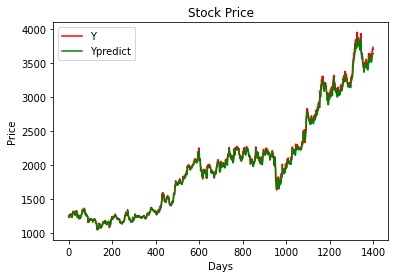

In [18]:
days = [i for i in range(0, len(testY2))]
plt.plot(days, testY2, color='r', label='Y')
plt.plot(days, testPredict2, color='g', label='Ypredict')
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Stock Price")
plt.legend()
plt.show()

LSTM Peephole

In [19]:
model3 = Sequential()
model3.add(InputLayer((trainX.shape[1], trainX.shape[2])))
model3.add(RNN(tfa.rnn.PeepholeLSTMCell(200)))
model3.add(Dense(trainY.shape[1]))
model3.compile(optimizer='adam', loss='mse')
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnn (RNN)                   (None, 200)               162200    
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 162,401
Trainable params: 162,401
Non-trainable params: 0
_________________________________________________________________


In [20]:
model3.fit(trainX, trainY, validation_data = (testX, testY), epochs = 50)

Epoch 1/50
103/103 [==============================] - 6s 43ms/step - loss: 6.5577e-04 - val_loss: 3.1244e-04
Epoch 2/50
103/103 [==============================] - 4s 40ms/step - loss: 2.4161e-05 - val_loss: 2.4593e-04
Epoch 3/50
103/103 [==============================] - 4s 40ms/step - loss: 2.4092e-05 - val_loss: 2.3857e-04
Epoch 4/50
103/103 [==============================] - 4s 41ms/step - loss: 2.4398e-05 - val_loss: 2.8203e-04
Epoch 5/50
103/103 [==============================] - 4s 41ms/step - loss: 2.4849e-05 - val_loss: 2.5851e-04
Epoch 6/50
103/103 [==============================] - 4s 41ms/step - loss: 2.4668e-05 - val_loss: 2.2999e-04
Epoch 7/50
103/103 [==============================] - 4s 40ms/step - loss: 2.5147e-05 - val_loss: 2.8971e-04
Epoch 8/50
103/103 [==============================] - 4s 41ms/step - loss: 2.3548e-05 - val_loss: 5.7809e-04
Epoch 9/50
103/103 [==============================] - 4s 40ms/step - loss: 2.8240e-05 - val_loss: 2.3901e-04
Epoch 10/50
103/103

In [21]:
trainPredict3 = model3.predict(trainX)
testPredict3 = model3.predict(testX)
trainPredict3 = scaler.inverse_transform(trainPredict3)
testPredict3 = scaler.inverse_transform(testPredict3)
trainY3 = scaler.inverse_transform(trainY.reshape(-1, 1))
testY3 = scaler.inverse_transform(testY.reshape(-1, 1))

In [22]:
mape3 = np.mean(np.abs((testY3 - testPredict3)/testY3))*100
mape3

1.4478519081870085

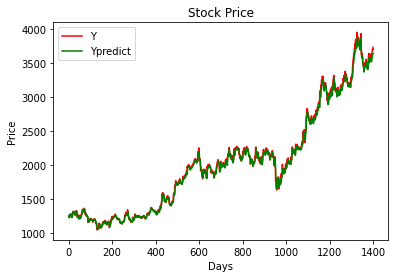

In [23]:
days = [i for i in range(0, len(testY3))]
plt.plot(days, testY3, color='r', label='Y')
plt.plot(days, testPredict3, color='g', label='Ypredict')
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Stock Price")
plt.legend()
plt.show()

Bidirectional LSTM

In [24]:
model4 = Sequential()
model4.add(InputLayer((trainX.shape[1], trainX.shape[2])))
model4.add(Bidirectional(LSTM(200)))
model4.add(Dense(trainY.shape[1]))
model4.compile(optimizer='adam', loss='mse')
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 400)              323200    
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 401       
                                                                 
Total params: 323,601
Trainable params: 323,601
Non-trainable params: 0
_________________________________________________________________


In [25]:
model4.fit(trainX, trainY, validation_data = (testX, testY), epochs = 50)

Epoch 1/50
103/103 [==============================] - 12s 74ms/step - loss: 5.6397e-04 - val_loss: 3.6677e-04
Epoch 2/50
103/103 [==============================] - 7s 66ms/step - loss: 3.0752e-05 - val_loss: 3.2853e-04
Epoch 3/50
103/103 [==============================] - 7s 68ms/step - loss: 3.0424e-05 - val_loss: 3.4645e-04
Epoch 4/50
103/103 [==============================] - 7s 68ms/step - loss: 2.9719e-05 - val_loss: 4.9394e-04
Epoch 5/50
103/103 [==============================] - 7s 68ms/step - loss: 2.8145e-05 - val_loss: 5.4401e-04
Epoch 6/50
103/103 [==============================] - 7s 66ms/step - loss: 3.3537e-05 - val_loss: 3.8452e-04
Epoch 7/50
103/103 [==============================] - 7s 64ms/step - loss: 2.8772e-05 - val_loss: 4.3060e-04
Epoch 8/50
103/103 [==============================] - 7s 66ms/step - loss: 2.6392e-05 - val_loss: 3.2604e-04
Epoch 9/50
103/103 [==============================] - 7s 68ms/step - loss: 2.6731e-05 - val_loss: 5.0464e-04
Epoch 10/50
103/10

In [26]:
trainPredict4 = model4.predict(trainX)
testPredict4 = model4.predict(testX)
trainPredict4 = scaler.inverse_transform(trainPredict4)
testPredict4 = scaler.inverse_transform(testPredict4)
trainY4 = scaler.inverse_transform(trainY.reshape(-1, 1))
testY4 = scaler.inverse_transform(testY.reshape(-1, 1))

In [27]:
mape4 = np.mean(np.abs((testY4 - testPredict4)/testY4))*100
mape4

1.5326246161944388

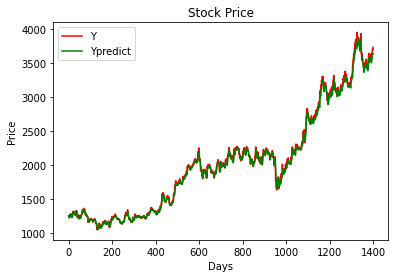

In [28]:
days = [i for i in range(0, len(testY4))]
plt.plot(days, testY4, color='r', label='Y')
plt.plot(days, testPredict4, color='g', label='Ypredict')
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Stock Price")
plt.legend()
plt.show()

GRU(Gated Recurrent Unit)

In [29]:
model5 = Sequential()
model5.add(InputLayer((trainX.shape[1], trainX.shape[2])))
model5.add(GRU(200))
model5.add(Dense(trainY.shape[1]))
model5.compile(optimizer='adam', loss='mse')
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 200)               121800    
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 122,001
Trainable params: 122,001
Non-trainable params: 0
_________________________________________________________________


In [30]:
model5.fit(trainX, trainY, validation_data = (testX, testY), epochs = 50)

Epoch 1/50
103/103 [==============================] - 6s 38ms/step - loss: 7.5373e-04 - val_loss: 1.4735e-04
Epoch 2/50
103/103 [==============================] - 3s 33ms/step - loss: 1.6563e-05 - val_loss: 1.4576e-04
Epoch 3/50
103/103 [==============================] - 3s 33ms/step - loss: 1.6332e-05 - val_loss: 1.4011e-04
Epoch 4/50
103/103 [==============================] - 3s 33ms/step - loss: 1.5792e-05 - val_loss: 1.4214e-04
Epoch 5/50
103/103 [==============================] - 3s 33ms/step - loss: 1.7222e-05 - val_loss: 1.3628e-04
Epoch 6/50
103/103 [==============================] - 3s 34ms/step - loss: 1.6036e-05 - val_loss: 1.9632e-04
Epoch 7/50
103/103 [==============================] - 3s 34ms/step - loss: 1.7279e-05 - val_loss: 1.4144e-04
Epoch 8/50
103/103 [==============================] - 3s 33ms/step - loss: 1.5076e-05 - val_loss: 2.3238e-04
Epoch 9/50
103/103 [==============================] - 4s 34ms/step - loss: 1.5780e-05 - val_loss: 1.2181e-04
Epoch 10/50
103/103

In [31]:
trainPredict5 = model5.predict(trainX)
testPredict5 = model5.predict(testX)
trainPredict5 = scaler.inverse_transform(trainPredict5)
testPredict5 = scaler.inverse_transform(testPredict5)
trainY5 = scaler.inverse_transform(trainY.reshape(-1, 1))
testY5 = scaler.inverse_transform(testY.reshape(-1, 1))

In [32]:
mape5 = np.mean(np.abs((testY5 - testPredict5)/testY5))*100
mape5

1.1514348391351656

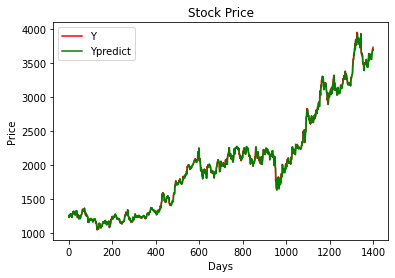

In [33]:
days = [i for i in range(0, len(testY5))]
plt.plot(days, testY5, color='r', label='Y')
plt.plot(days, testPredict5, color='g', label='Ypredict')
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Stock Price")
plt.legend()
plt.show()